# Practice session 2
---
This is the solution to the first exercise

## Import our tool for calculations

In [1]:
import numpy as np

## Initialization of variables


In [2]:
V_rms=230*np.sqrt(2)                                # RMS voltage 
f0=50                                               # Frequency   
t0=1/f0                                             # Time Period for one sinusoid cycle
N_samples_per_cycle=20                             # Number of samples per cycle
f_sampling=N_samples_per_cycle*f0                   # Sampling frequency
N_cycles=2                                          # Number of cycles of sinusoid considered (number of the cyles in the window)
N_total_samples=N_cycles*N_samples_per_cycle+1      # Total number of samples within a window of N_cycles
dt=1/f_sampling                                     # Sampling Time
t=dt*np.linspace(0,N_total_samples,N_total_samples) # Generation of time domain
w=2*np.pi*f0                                        # Angular frequency

## Initialization of impedances
Here we put all the cases to solve our exercise

In [3]:
Zload0=12       # Base case
Zload1=12+1j*13 # Case 1
Zload2=12-1j*13 # Case 2
Zload3= 1j*13   # Case 3
Zload4= -1j*13  # Case 4

## Generate the timeseries for the voltage source
We use the Peak Voltage here because of the RMS parameter

In [4]:
v_t=V_rms*np.sqrt(2)*np.sin(w*t)

## Import the package for Figures

In [5]:
import matplotlib.pyplot as plt

## Plot the voltage signal

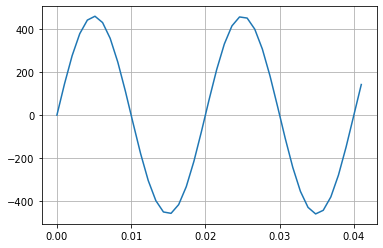

In [6]:
plt.plot(t,v_t)
plt.grid()
plt.show()

## Select the load

In [7]:
Zload=Zload2

## Solve no. 1
Here we calculate the current

In [8]:
I_rms=V_rms/abs(Zload)
phi=np.arctan(np.imag(Zload)/np.real(Zload))
i_t=I_rms*np.sqrt(2)*np.sin(w*t-phi*np.ones(np.size(t)))
print ("RMS current is " + str(I_rms) + " A" + "\nAngle is " + str(phi) + " rad")

RMS current is 18.38529764048093 A
Angle is -0.8253768505207383 rad


Now we can plot both together

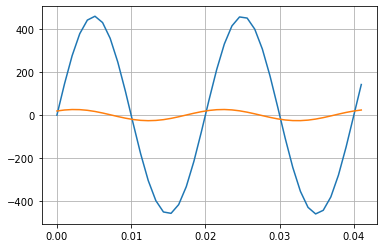

In [9]:
plt.plot(t,v_t, t, i_t)
plt.grid()
plt.show()

## Calculation of instantaneous power

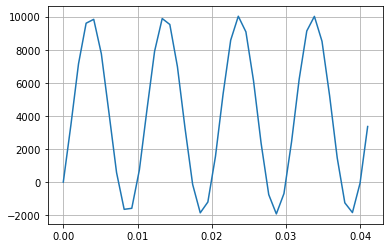

In [10]:
s_t=v_t*i_t
plt.plot(t,s_t)
plt.grid()
plt.show()

## Calculation of active power

In [11]:
P=np.sum(s_t*dt)/(N_cycles*t0)
P_act=V_rms*I_rms*np.cos(phi)
print("Method 1 result is "+ str(P) + " W\nMethod 2 result is " + str(P_act)+ " W")

Method 1 result is 4040.3138491203295 W
Method 2 result is 4056.2300319488827 W


## Calculation of reactive power

In [12]:
Q=V_rms*I_rms*np.sin(phi)
print("Rective power "+ str(Q)+ " VA")

Rective power -4394.249201277956 VA


## Calculation of Apparent Power

In [13]:
S=V_rms*I_rms
print("Apparent power "+ str(S)+ " VA")

Apparent power 5980.169572429864 VA


## Calculation of Power Factor

In [14]:
pf=P/S
print("Power Factor "+ str(pf))

Power Factor 0.6756186091690821


## Plot the powers

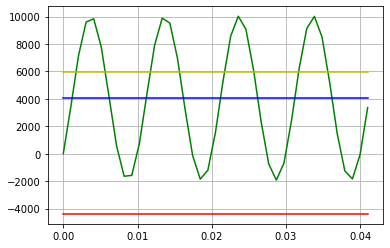

In [15]:
plt. plot(t,s_t,'g',t,P*np.ones(np.size(t)),'b',t,Q*np.ones(np.size(t)),'r',t,S*np.ones(np.size(t)),'y')
plt.grid()
plt.show()